In [57]:
pip install --upgrade linear-tree

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('C:\\Users\\crew laptop\\Desktop\\CS 325 DATA MINING\\Datasets\\Mod 3\\Heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [60]:
df['ChestPain'].replace(['typical', 'nontypical', 'nonanginal', 'asymptomatic'], [1,2,3,4], inplace=True)
df['Thal'].replace(['normal', 'fixed', 'reversable'], [1,2,3], inplace=True)
df['AHD'].replace(['No', 'Yes'], [0,1], inplace=True)
df.replace('NA', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)
df.dropna( inplace = True, how = 'any')
df = df[df.Thal != '.']
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0


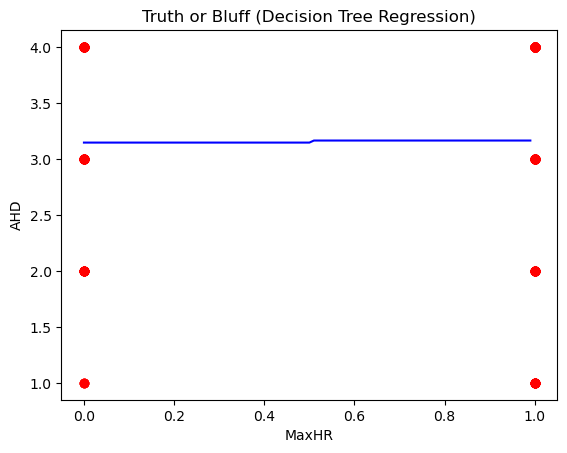

In [61]:
from sklearn.tree import DecisionTreeRegressor

#Getting X and y variable
X = df.iloc[:,1:2].values
y =df.iloc[:,2].values


#Creating a model object and fiting the data
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X,y)

# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('MaxHR')
plt.ylabel('AHD')
plt.show()